# Lab 8: Define and Solve an ML Problem of Your Choosing

In [ ]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [5]:
# Load all datasets
df_census = pd.read_csv(adultDataSet_filename)
df_airbnb = pd.read_csv(airbnbDataSet_filename)
df_whr = pd.read_csv(WHRDataSet_filename)
df_books = pd.read_csv(bookReviewDataSet_filename)

# Display the first few rows of each
print("Census Data:")
print(df_census.head(), "\n")

print("Airbnb Data:")
print(df_airbnb.head(), "\n")

print("World Happiness Report:")
print(df_whr.head(), "\n")

print("Book Reviews:")
print(df_books.head(), "\n")


Census Data:
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.0  United-States  

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

For this project, I have chosen the Airbnb NYC Listings dataset. My goal is to predict the price of an Airbnb listing based on various features such as location, room type, number of reviews, availability, and other listing attributes. In this case, the label or target variable is the price. This is a supervised learning problem because we have historical data with both input features and the output labels (prices). More specifically, this is a regression problem since the label is a continuous numerical value. The initial set of features I plan to use includes neighbourhood_group, neighbourhood, room_type, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, and availability_365, although this list may evolve after further data exploration and cleaning. This problem is important because accurately predicting listing prices can help Airbnb hosts price their properties more competitively and fairly. For Airbnb as a company, such a model could be integrated into its platform to provide pricing recommendations for hosts, which could lead to more bookings, improved customer satisfaction, and increased overall revenue.



## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

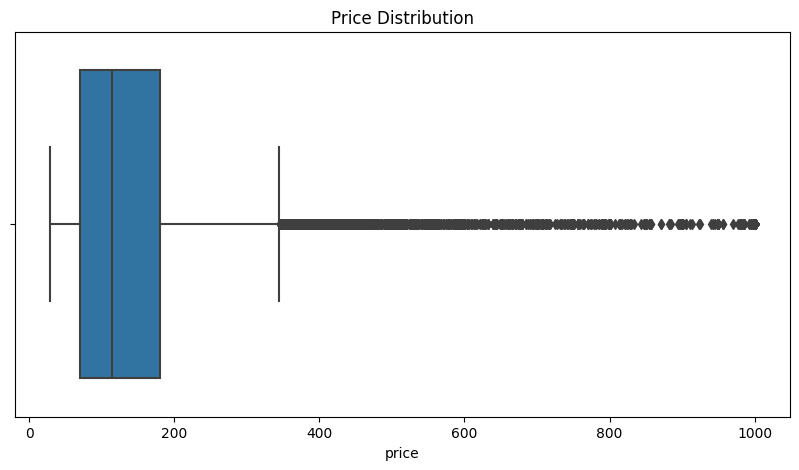

TypeError: corr() got an unexpected keyword argument 'numeric_only'

<Figure size 1000x600 with 0 Axes>

In [6]:
# View data types and null values
df_airbnb.info()

# Basic statistics
df_airbnb.describe()

# Check for missing values
df_airbnb.isnull().sum()

# Check for duplicates
df_airbnb.duplicated().sum()

# View price distribution (helps detect outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_airbnb['price'])
plt.title("Price Distribution")
plt.show()

# Check correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df_airbnb.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Count plots for categorical features
sns.countplot(data=df_airbnb, x='neighbourhood_group')
plt.title("Distribution of Listings by Neighbourhood Group")
plt.show()

sns.countplot(data=df_airbnb, x='room_type')
plt.title("Distribution of Room Types")
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the data, I revised my feature list to keep only the most relevant variables for predicting Airbnb listing prices. I plan to retain features such as neighbourhood_group, neighbourhood, room_type, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, and availability_365. I will remove irrelevant or non-informative columns such as id, name, host_name, and last_review. For data preparation, I will address missing values by imputing the mean for numerical columns like reviews_per_month. I will also remove or cap extreme outliers in the price column to avoid skewing the model. Categorical variables such as room_type and neighbourhood_group will be converted using one-hot encoding, and I will apply feature scaling using StandardScaler to normalize numerical inputs.

For modeling, I plan to start with linear regression as a baseline and then explore more complex models such as random forest regressor and gradient boosting regressor to improve accuracy. I will split the dataset into training and testing sets using an 80/20 split and use cross-validation to validate performance and reduce overfitting. Evaluation metrics will include RMSE, MAE, and R² score, which are suitable for regression tasks. Based on performance metrics and residual analysis, I will tune hyperparameters and compare model results to select the one that best generalizes to unseen data. My goal is to build a well-balanced and interpretable model that can help predict Airbnb prices accurately and support better pricing strategies.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [7]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [ ]:
* Begin by preparing the data for modeling

  * Handle missing values
  * Encode categorical variables using one-hot encoding
  * Scale numerical features using StandardScaler
  * Remove or cap outliers in the price column

* Split the dataset into training and testing sets to evaluate performance on unseen data

* Fit a baseline linear regression model to establish initial performance

* Evaluate model performance using appropriate metrics

  * Root Mean Squared Error (RMSE)
  * Mean Absolute Error (MAE)
  * R² Score

* Train additional models to improve accuracy

  * Random Forest Regressor
  * Gradient Boosting Regressor

* Perform feature selection and hyperparameter tuning to optimize model performance

* Use cross-validation to validate model stability and reduce overfitting

* Add code cells to document each step

  * Data preparation
  * Model training
  * Model evaluation
  * Model improvement

* Include visualizations and explanations throughout to support analysis and decisions

* Select the final model that provides the best generalization on new data for Airbnb price prediction
